In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
## Uncomment once per computer

#!pip install Thermobar
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/0.02.zip"
import Thermobar as pt

In [3]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Neave typical experiment

In [4]:
out_2nd_NExp=pt.import_excel('Supporting_Data_5.xlsx', 
                             sheet_name='Neave_Cpx', suffix="_Cpx")
Cpxs_2nd_NExp=out_2nd_NExp['Cpxs']
input_2nd_NExp=out_2nd_NExp['my_input']
cpx_comp_2nd_NExp=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs_2nd_NExp)
All_NExp=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpxs_2nd_NExp)
All_NExp['P_kbar_x']=input_2nd_NExp['Pressure(MPa)']/100
sam1="B0183-4"
sam2="Y0200-3"
All_NExp_sam1=All_NExp.loc[input_2nd_NExp['ExperimentID']==sam1]
All_NExp_sam2=All_NExp.loc[input_2nd_NExp['ExperimentID']==sam2]
Cpxs_Expsam1=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']==sam1]
Cpxs_Expsam2=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']==sam2]

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## Melekhova typical Expermient

In [5]:
out_bm49_glass=pt.import_excel('Supporting_Data_7.xlsx', 
                               sheet_name='bm49_glass', suffix="_Liq")
bm49_glass=out_bm49_glass['Liqs']
input_bm49_glass=out_bm49_glass['my_input']

out_bm49_cpx=pt.import_excel('Supporting_Data_7.xlsx', sheet_name='bm49_cpx', suffix="_Cpx")
bm49_cpx=out_bm49_cpx['Cpxs']


bm49_cpx_only=pt.calculate_cpx_only_press_all_eqs(cpx_comps=bm49_cpx, H2O_Liq=6)
bm49_cpx_only['P_kbar_x']=13
bm49_cpx_only['P_kbar_x']=13
bm49_cpx_liq_NP=pt.calculate_cpx_liq_press_temp_matching(liq_comps=bm49_glass, cpx_comps=bm49_cpx, equationT="T_Put2008_eq33",
equationP="P_Neave2017", CaTs_Err=20*0.06,       DiHd_Err=20*0.12, EnFs_Err=20*0.1, Kd_Err=1, H2O_Liq=6)
bm49_cpx_liq_all_NP=bm49_cpx_liq_NP['All_PTs']

bm49_cpx_liq_P30=pt.calculate_cpx_liq_press_temp_matching(liq_comps=bm49_glass, cpx_comps=bm49_cpx, equationT="T_Put2008_eq33",
equationP="P_Put2008_eq30", CaTs_Err=20*0.06,       DiHd_Err=20*0.12, EnFs_Err=20*0.1, Kd_Err=1, H2O_Liq=6)
bm49_cpx_liq_all_P30=bm49_cpx_liq_P30['All_PTs']

Considering N=23 Cpx & N=25 Liqs, which is a total of N=575 Liq-Cpx pairs, be patient if this is >>1 million!
575 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=575 Cpx-Liq matches using the specified filter. N=23 Cpx out of the N=23 Cpx that you input matched to 1 or more liquids
Considering N=23 Cpx & N=25 Liqs, which is a total of N=575 Liq-Cpx pairs, be patient if this is >>1 million!
575 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=575 Cpx-Liq matches using the specified filter. N=23 Cpx out of the N=23 Cpx that you input matched to 1 or more liquids


## Waters experiment. 

In [6]:
out_Waters_Exp_Cpx=pt.import_excel('Supporting_Data_8.xlsx',
                             sheet_name='Cpxs', suffix="_Cpx")
Exp_Cpx=out_Waters_Exp_Cpx['Cpxs']
Exp_Cpx_in=out_Waters_Exp_Cpx['my_input']
All_NExp=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Exp_Cpx)
Combo_Cpx_PT=pd.concat([Exp_Cpx, All_NExp], axis=1)
Combo_Cpx_PT['Exp']=Exp_Cpx_in['Experiment']
Cpxs_19MR_PT=Combo_Cpx_PT.loc[Combo_Cpx_PT['Exp']=="19MR"].reset_index(drop=True)
Cpxs_20MR_PT=Combo_Cpx_PT.loc[Combo_Cpx_PT['Exp']=="20MR"].reset_index(drop=True)

Cpxs_19MR=Exp_Cpx.loc[Combo_Cpx_PT['Exp']=="19MR"].reset_index(drop=True)
Cpxs_20MR=Exp_Cpx.loc[Combo_Cpx_PT['Exp']=="20MR"].reset_index(drop=True)

Av_Cpxs_20MR=Cpxs_20MR.mean(axis=0).to_frame().T
Av_Cpxs_19MR=Cpxs_19MR.mean(axis=0).to_frame().T

Av_19MR_Cpx_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Av_Cpxs_19MR)
Av_20MR_Cpx_All=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Av_Cpxs_20MR)


## Erdman Experiment

In [7]:
out_2nd_NExp=pt.import_excel('Supporting_Data_6.xlsx',
                             sheet_name='Cpx', suffix="_Cpx")
Cpxs_2nd_NExp=out_2nd_NExp['Cpxs']
input_2nd_NExp=out_2nd_NExp['my_input']
cpx_comp_2nd_NExp=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs_2nd_NExp)
All_NExp=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpxs_2nd_NExp)
All_NExp['P_kbar_x']=input_2nd_NExp['P (MPa)']/100
All_NExp['T_K_x']=input_2nd_NExp['Temperature_C']+273.15

# Charges, are fixed H2O
All_NExp_10_36c=All_NExp.loc[input_2nd_NExp['Charge']=="10-36c"]
All_NExp_10_38c=All_NExp.loc[input_2nd_NExp['Charge']=="10-38c"]
All_NExp_10_37c=All_NExp.loc[input_2nd_NExp['Charge']=="10-37c"]
All_NExp_7_26c=All_NExp.loc[input_2nd_NExp['Charge']=="7-26c"]

All_NExp_10_39c=All_NExp.loc[input_2nd_NExp['Charge']=="10-39c"]
All_NExp_10_41c=All_NExp.loc[input_2nd_NExp['Charge']=="10-41c"]
All_NExp_1_10c=All_NExp.loc[input_2nd_NExp['Charge']=="1-10c"]
All_NExp_CE10=All_NExp.loc[input_2nd_NExp['Charge']=="8-23c"]




# Experiments are variable fo2
All_NExp_CE10=All_NExp.loc[input_2nd_NExp['Experiment']=="CE-10"]
All_NExp_CE9=All_NExp.loc[input_2nd_NExp['Experiment']=="CE-9"]
All_NExp_CE8=All_NExp.loc[input_2nd_NExp['Experiment']=="CE-8"]

All_NExp_CE7=All_NExp.loc[input_2nd_NExp['Experiment']=="CE-7"]
All_NExp_CE1=All_NExp.loc[input_2nd_NExp['Experiment']=="CE-1"]

Cpxs_NExp_10_36c=Cpxs_2nd_NExp.loc[input_2nd_NExp['Charge']=="10-36c"]
Cpxs_NExp_10_38c=Cpxs_2nd_NExp.loc[input_2nd_NExp['Charge']=="10-38c"]
Cpxs_NExp_10_37c=Cpxs_2nd_NExp.loc[input_2nd_NExp['Charge']=="10-37c"]
Cpxs_NExp_7_26c=Cpxs_2nd_NExp.loc[input_2nd_NExp['Charge']=="7-26c"]

Cpxs_NExp_10_39c=Cpxs_2nd_NExp.loc[input_2nd_NExp['Charge']=="10-39c"]
Cpxs_NExp_10_41c=Cpxs_2nd_NExp.loc[input_2nd_NExp['Charge']=="10-41c"]
Cpxs_NExp_1_10c=Cpxs_2nd_NExp.loc[input_2nd_NExp['Charge']=="1-10c"]
Cpxs_NExp_8_23c=Cpxs_2nd_NExp.loc[input_2nd_NExp['Charge']=="8-23c"]


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## Blatter et al. 2013

In [8]:
out_Cpx_2374_rim=pt.import_excel('Supporting_Data_9.xlsx', sheet_name='2374_Cpx_Rims', suffix="_Cpx")
Cpx_2374_rim=out_Cpx_2374_rim['Cpxs']
Cpx_2374_rim_input=out_Cpx_2374_rim['my_input']
Cpx_2374_rim_Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_2374_rim)

In [9]:
out_Cpx_2362=pt.import_excel('Supporting_Data_9.xlsx', sheet_name='2362_Cpx', suffix="_Cpx")
Cpx_2362=out_Cpx_2362['Cpxs']
Cpx_2362_input=out_Cpx_2362['my_input']
Cpx_2362_Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_2362)

## Krawzinski et al. (2012)

In [10]:
out_Cpx_41c_110=pt.import_excel('Supporting_Data_2.xlsx', sheet_name='41c_110', suffix="_Cpx")
Cpx_41c_110_all=out_Cpx_41c_110['Cpxs']
Cpx_41c_110_input_all=out_Cpx_41c_110['my_input']

# As has all minerals, need to filter out things that arent Cpx
IsCpx_41c_110=Cpx_41c_110_input_all['phase']=="cpx"
Cpx_41c_110=Cpx_41c_110_all.loc[IsCpx_41c_110].reset_index(drop=True)
Cpx_41c_110_input=Cpx_41c_110_input_all.loc[IsCpx_41c_110].reset_index(drop=True)
H2O_41c_110=13 #Exp_Cond.loc[Exp_Cond['Experiment']=="41c_110", 'H2O_Liq'].iloc[0]
Cpx_41c_110_Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_41c_110, H2O_Liq=H2O_41c_110)

## Same plot style as Fig. 2

### Tidying up neave data for correlation plot

In [11]:

Cpxs_Expsam2_d=Cpxs_Expsam2.drop(columns=['K2O_Cpx', 'Sample_ID_Cpx'])
Cpxs_Expsam2_dc=Cpxs_Expsam2_d.copy()
Cpxs_Expsam2_dc.columns=Cpxs_Expsam2_d.columns.str.replace('_Cpx', '')

Cpxs_Expsam2_d_neat1=Cpxs_Expsam2_dc.rename(columns={'SiO2': 'SiO$_2$',
                                                      'TiO2': 'TiO$_2$',
                                                          'Al2O3': 'Al$_2$O$_3$',
                                                         'FeOt': 'FeO$_t$',
                                                         'Cr2O3': 'Cr$_2$O$_3$',
                                                         'Na2O': 'Na$_2$O'
                                                      })

Cpxs_Expsam1_d=Cpxs_Expsam1.drop(columns=['K2O_Cpx', 'Sample_ID_Cpx'])
Cpxs_Expsam1_dc=Cpxs_Expsam1_d.copy()
Cpxs_Expsam1_dc.columns=Cpxs_Expsam1_d.columns.str.replace('_Cpx', '')

Cpxs_Expsam1_d_neat1=Cpxs_Expsam1_dc.rename(columns={'SiO2': 'SiO$_2$',
                                                      'TiO2': 'TiO$_2$',
                                                          'Al2O3': 'Al$_2$O$_3$',
                                                         'FeOt': 'FeO$_t$',
                                                         'Cr2O3': 'Cr$_2$O$_3$',
                                                         'Na2O': 'Na$_2$O'
                                                      })

mask2 = np.tril(Cpxs_Expsam2_d_neat1.corr())
mask3 = np.tril(Cpxs_Expsam1_d_neat1.corr())



## Paper Figure - Spread in a single experiment, and Na2O vs. Pressure

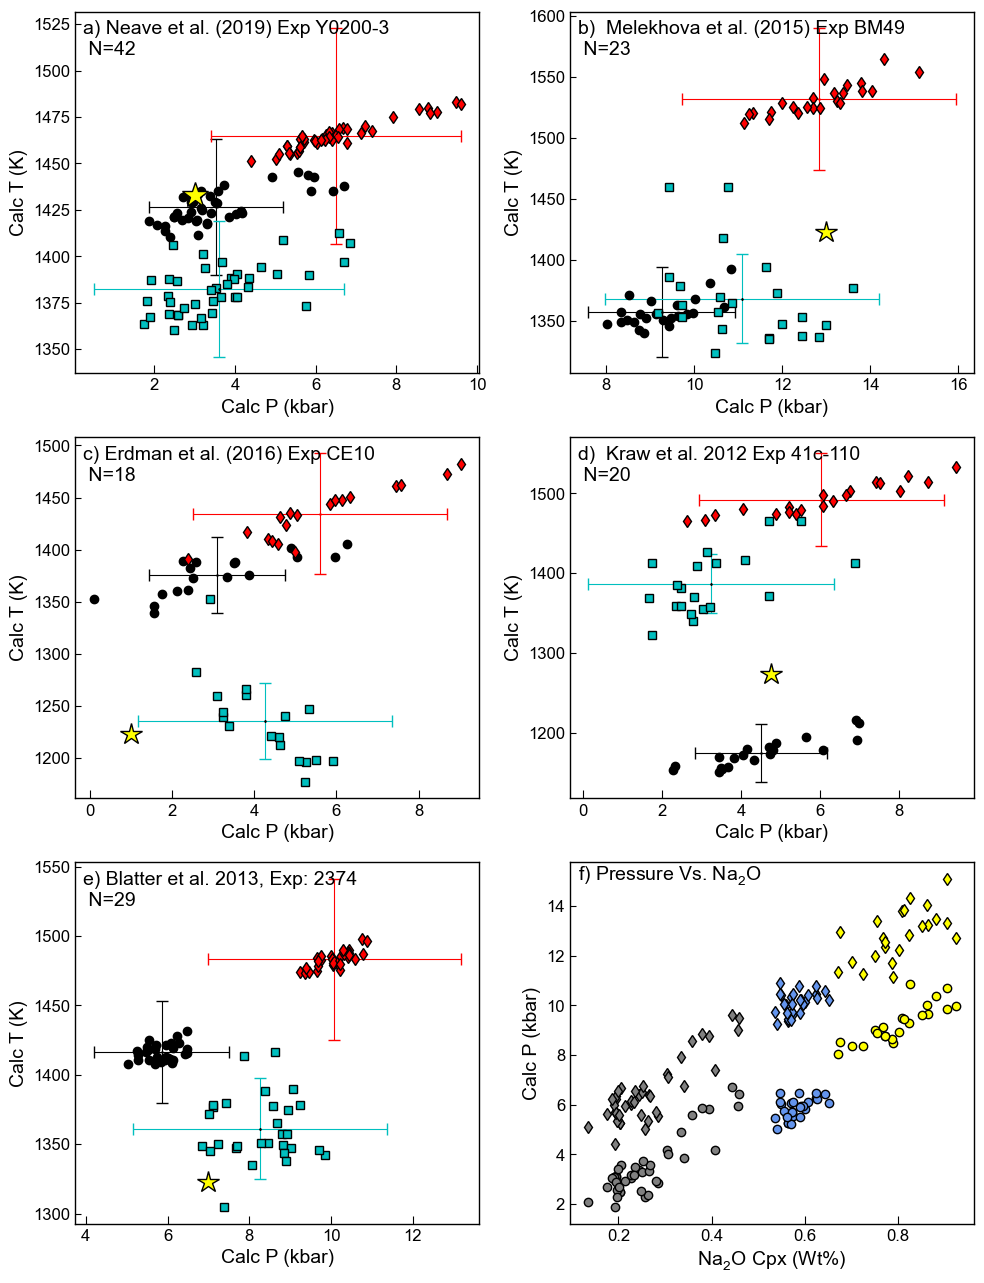

In [12]:
import seaborn as sns
fig, ( (ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(3,2, figsize = (10,13)) # adjust dimensions of figure here

Wang_T_error=36.6
Wang_P_error=1.66

P2008_32d_T_error=58 # Anhydrous
xerr=P2008_32a_P_error=3.1

ax0.annotate('a) Neave et al. (2019) Exp Y0200-3 \n N='+str(len(All_NExp_sam2)), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=14)
ax0.errorbar(np.mean(All_NExp_sam2['P_Wang21_eq1']), np.mean(All_NExp_sam2['T_Wang21_eq2']), 
       xerr=Wang_P_error, yerr=Wang_T_error, fmt='d', ecolor='k', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')
ax0.errorbar(np.mean(All_NExp_sam2['P_Petrelli20']), np.mean(All_NExp_sam2['T_Petrelli20']), 
       xerr=P2008_32a_P_error, yerr=Wang_T_error, fmt='d', ecolor='c', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')

ax0.errorbar(np.mean(All_NExp_sam2['P_Put_Teq32d_Peq32a']), np.mean(All_NExp_sam2['T_Put_Teq32d_Peq32a']), 
       xerr=P2008_32a_P_error, yerr=P2008_32d_T_error, fmt='d', ecolor='r', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='r',  label='Exp. Av +-1s')

ax0.plot(All_NExp_sam2['P_Wang21_eq1'], All_NExp_sam2['T_Wang21_eq2'], 'ok', label='Ind. Points')
ax0.plot(All_NExp_sam2['P_Petrelli20'], All_NExp_sam2['T_Petrelli20'], 'sk', mfc='c', label='Ind. Points')

ax0.plot(All_NExp_sam2['P_Put_Teq32d_Peq32a'], All_NExp_sam2['T_Put_Teq32d_Peq32a'], 'dk', mfc='r', label='Ind. Points')

# Actual Pressure and temperature - 300 MPA, 1160 C
ax0.plot(3, 1160+273.15, '*k', mfc='yellow', ms=19, zorder=100)
ax0.set_xlabel('Calc P (kbar)')
ax0.set_ylabel('Calc T (K)')

ax1.annotate('b)  Melekhova et al. (2015) Exp BM49 \n N='+str(len(bm49_cpx_only)), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=14)
ax1.errorbar(np.mean(bm49_cpx_only['P_Wang21_eq1']), np.mean(bm49_cpx_only['T_Wang21_eq2']), 
       xerr=Wang_P_error, yerr=Wang_T_error, fmt='d', ecolor='k', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')
ax1.errorbar(np.mean(bm49_cpx_only['P_Petrelli20']), np.mean(bm49_cpx_only['T_Petrelli20']), 
       xerr=P2008_32a_P_error, yerr=Wang_T_error, fmt='d', ecolor='c', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')

ax1.errorbar(np.mean(bm49_cpx_only['P_Put_Teq32d_Peq32a']), np.mean(bm49_cpx_only['T_Put_Teq32d_Peq32a']), 
       xerr=P2008_32a_P_error, yerr=P2008_32d_T_error, fmt='d', ecolor='r', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='r',  label='Exp. Av +-1s')

ax1.plot(bm49_cpx_only['P_Wang21_eq1'], bm49_cpx_only['T_Wang21_eq2'], 'ok', label='Ind. Points')
ax1.plot(bm49_cpx_only['P_Petrelli20'], bm49_cpx_only['T_Petrelli20'], 'sk', mfc='c', label='Ind. Points')

ax1.plot(bm49_cpx_only['P_Put_Teq32d_Peq32a'], bm49_cpx_only['T_Put_Teq32d_Peq32a'], 'dk', mfc='r', label='Ind. Points')

# Real pressure
ax1.plot(13, 1423.15, '*k', mfc='yellow', ms=16, zorder=10)

ax2.annotate('c) Erdman et al. (2016) Exp CE10 \n N='+str(len(All_NExp_CE10)), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=14)
ax2.errorbar(np.mean(All_NExp_CE10['P_Wang21_eq1']), np.mean(All_NExp_CE10['T_Wang21_eq2']), 
       xerr=Wang_P_error, yerr=Wang_T_error, fmt='d', ecolor='k', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')
ax2.errorbar(np.mean(All_NExp_CE10['P_Petrelli20']), np.mean(All_NExp_CE10['T_Petrelli20']), 
       xerr=P2008_32a_P_error, yerr=Wang_T_error, fmt='d', ecolor='c', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')

ax2.errorbar(np.mean(All_NExp_CE10['P_Put_Teq32d_Peq32a']), np.mean(All_NExp_CE10['T_Put_Teq32d_Peq32a']), 
       xerr=P2008_32a_P_error, yerr=P2008_32d_T_error, fmt='d', ecolor='r', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='r',  label='Exp. Av +-1s')

ax2.plot(All_NExp_CE10['P_Wang21_eq1'], All_NExp_CE10['T_Wang21_eq2'], 'ok', label='Ind. Points')
ax2.plot(All_NExp_CE10['P_Petrelli20'], All_NExp_CE10['T_Petrelli20'], 'sk', mfc='c', label='Ind. Points')

ax2.plot(All_NExp_CE10['P_Put_Teq32d_Peq32a'], All_NExp_CE10['T_Put_Teq32d_Peq32a'], 'dk', mfc='r', label='Ind. Points')
ax2.plot(0.99, 950+273.15, '*k', mfc='yellow', ms=16, zorder=10)


ax3.annotate('d)  Kraw et al. 2012 Exp 41c-110 \n N='+str(len(Cpx_41c_110_Calc)), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=14)
ax3.errorbar(np.mean(Cpx_41c_110_Calc['P_Wang21_eq1']), np.mean(Cpx_41c_110_Calc['T_Wang21_eq2']), 
       xerr=Wang_P_error, yerr=Wang_T_error, fmt='d', ecolor='k', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')
ax3.errorbar(np.mean(Cpx_41c_110_Calc['P_Petrelli20']), np.mean(Cpx_41c_110_Calc['T_Petrelli20']), 
       xerr=P2008_32a_P_error, yerr=Wang_T_error, fmt='d', ecolor='c', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')

ax3.errorbar(np.mean(Cpx_41c_110_Calc['P_Put_Teq32d_Peq32a']), np.mean(Cpx_41c_110_Calc['T_Put_Teq32d_Peq32a']), 
       xerr=P2008_32a_P_error, yerr=P2008_32d_T_error, fmt='d', ecolor='r', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='r',  label='Exp. Av +-1s')

ax3.plot(Cpx_41c_110_Calc['P_Wang21_eq1'], Cpx_41c_110_Calc['T_Wang21_eq2'], 'ok', label='Ind. Points')
ax3.plot(Cpx_41c_110_Calc['P_Petrelli20'], Cpx_41c_110_Calc['T_Petrelli20'], 'sk', mfc='c', label='Ind. Points')
ax3.plot(Cpx_41c_110_Calc['P_Put_Teq32d_Peq32a'], Cpx_41c_110_Calc['T_Put_Teq32d_Peq32a'], 'dk', mfc='r', label='Ind. Points')
ax3.plot(4.76, 1273.15, '*k', mfc='yellow', ms=16, zorder=10)








ax4.annotate('e) Blatter et al. 2013, Exp: 2374 \n N='+str(len(Cpx_2374_rim_Calc)), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=14)
ax4.errorbar(np.mean(Cpx_2374_rim_Calc['P_Wang21_eq1']), np.mean(Cpx_2374_rim_Calc['T_Wang21_eq2']), 
       xerr=Wang_P_error, yerr=Wang_T_error, fmt='d', ecolor='k', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')
ax4.errorbar(np.mean(Cpx_2374_rim_Calc['P_Petrelli20']), np.mean(Cpx_2374_rim_Calc['T_Petrelli20']), 
       xerr=P2008_32a_P_error, yerr=Wang_T_error, fmt='d', ecolor='c', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='k', label='Exp. Av +-1s')

ax4.errorbar(np.mean(Cpx_2374_rim_Calc['P_Put_Teq32d_Peq32a']), np.mean(Cpx_2374_rim_Calc['T_Put_Teq32d_Peq32a']), 
       xerr=P2008_32a_P_error, yerr=P2008_32d_T_error, fmt='d', ecolor='r', capsize=4, elinewidth=0.8, mfc='cyan', ms=1, mec='r',  label='Exp. Av +-1s')

ax4.plot(Cpx_2374_rim_Calc['P_Wang21_eq1'], Cpx_2374_rim_Calc['T_Wang21_eq2'], 'ok', label='Ind. Points')
ax4.plot(Cpx_2374_rim_Calc['P_Petrelli20'], Cpx_2374_rim_Calc['T_Petrelli20'], 'sk', mfc='c', label='Ind. Points')
ax4.plot(Cpx_2374_rim_Calc['P_Put_Teq32d_Peq32a'], Cpx_2374_rim_Calc['T_Put_Teq32d_Peq32a'], 'dk', mfc='r', label='Ind. Points')

ax4.plot(7,1050+273.15, '*k', mfc='yellow', ms=16, zorder=10)



ax5.plot(All_NExp_sam2['Na2O_Cpx'], All_NExp_sam2['P_Wang21_eq1'], 'ok', mfc='grey')
ax5.plot(Cpx_2374_rim_Calc['Na2O_Cpx'], Cpx_2374_rim_Calc['P_Wang21_eq1'], 'ok', mfc='cornflowerblue')
ax5.plot(bm49_cpx_only['Na2O_Cpx'], bm49_cpx_only['P_Wang21_eq1'], 'ok', mfc='yellow')

ax5.plot(All_NExp_sam2['Na2O_Cpx'], All_NExp_sam2['P_Put_Teq32d_Peq32a'], 'dk', mfc='grey')
ax5.plot(Cpx_2374_rim_Calc['Na2O_Cpx'], Cpx_2374_rim_Calc['P_Put_Teq32d_Peq32a'], 'dk', mfc='cornflowerblue')
ax5.plot(bm49_cpx_only['Na2O_Cpx'], bm49_cpx_only['P_Put_Teq32d_Peq32a'], 'dk', mfc='yellow')

ax5.annotate('f) Pressure Vs. Na$_2$O', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax5.set_ylabel('Calc P (kbar)')
ax5.set_xlabel('Na$_2$O Cpx (Wt%)')


ax1.set_xlabel('Calc P (kbar)')
ax1.set_ylabel('Calc T (K)')
ax2.set_ylabel('Calc T (K)')
ax3.set_ylabel('Calc T (K)')
ax4.set_ylabel('Calc T (K)')
ax2.set_xlabel('Calc P (kbar)')
ax3.set_xlabel('Calc P (kbar)')
ax4.set_xlabel('Calc P (kbar)')
fig.tight_layout()

fig.savefig('Cpx_only_Exp_Noise.png', dpi=200)

In [13]:
All_NExp_sam2

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,P_Put_Teq32d_Peq32a,P_Put_Teq32d_Peq32b,"Jd_from 0=Na, 1=Al",SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,H2O_Liq,T_Put_Teq32d_subsol_Peq32a,T_Put_Teq32d_subsol_Peq32b,P_Put_Teq32d_subsol_Peq32a,P_Put_Teq32d_subsol_Peq32b,P_kbar_x
237,4.183018,1423.176298,1395.921144,4.053239,1373.277778,1405.201111,5.875247,1467.454108,1452.667506,5.754291,7.408227,5.609113,0,50.641584,0.829572,3.584965,10.709760,0.282218,15.915777,17.012860,0.407276,0.0,0.069958,237,1.893175,0.886992,0.334826,0.681450,0.157952,0.029520,0.0,0.008936,0.023327,0.002068,0.0,0.106825,0.051127,0.466036,0.175922,0.358042,4.018248,0.358042,0.036495,0.298331,0.108997,0.001034,0.261638,0.725954,0.029520,0.021607,0.042609,0.616200,0.302809,0.616200,0.444089,0.036495,0.298331,0,1355.296040,1324.784017,5.525238,2.624719,3.0
238,2.838306,1420.623534,1390.943532,1.687771,1388.120000,1392.723333,3.794991,1455.508204,1444.161915,3.894078,5.537154,4.159884,0,51.178594,0.711299,2.357116,11.095477,0.344073,17.135187,15.492465,0.284321,0.0,0.062126,238,1.923308,0.959971,0.348708,0.623813,0.104400,0.020717,0.0,0.010952,0.020107,0.001846,0.0,0.076692,0.027708,0.496753,0.180445,0.322802,4.013821,0.322802,0.027641,0.321067,0.079267,0.000923,0.332905,0.733535,0.020717,0.006991,0.034850,0.581048,0.363815,0.581048,0.422686,0.027641,0.321067,0,1378.632730,1355.173998,4.125148,1.956698,3.0
239,3.149613,1425.994078,1398.826617,1.202525,1390.542222,1394.978889,3.664067,1465.524771,1447.391763,4.063267,6.246625,4.051816,0,51.707850,0.659829,2.523526,10.917491,0.333633,17.209157,15.407643,0.195591,0.0,0.049718,239,1.930667,0.957898,0.340902,0.616397,0.111049,0.014159,0.0,0.010551,0.018532,0.001468,0.0,0.069333,0.041716,0.500156,0.177999,0.321845,4.001623,0.321845,0.003245,0.337657,0.009520,0.000734,0.346044,0.737519,0.014159,0.027557,0.020888,0.567218,0.365791,0.567218,0.414966,0.003245,0.337657,0,1393.758140,1363.458651,4.696805,1.913984,3.0
240,2.914454,1424.101283,1398.023134,1.573873,1387.660000,1390.824444,3.809258,1461.677437,1449.768415,3.967760,5.710761,4.269871,0,51.965023,0.605332,2.315409,10.952583,0.356421,17.561888,15.717891,0.280458,0.0,0.063094,240,1.927442,0.971068,0.339737,0.624651,0.101217,0.020169,0.0,0.011197,0.016889,0.001850,0.0,0.072558,0.028659,0.501726,0.175533,0.322741,4.014221,0.322741,0.028441,0.311296,0.083715,0.000925,0.333294,0.740812,0.020169,0.008490,0.032034,0.583202,0.363802,0.583202,0.428387,0.028441,0.311296,0,1383.451634,1359.823361,4.163682,1.986510,3.0
241,2.273478,1413.384876,1391.896269,1.799545,1369.501111,1373.817778,3.304353,1452.515964,1441.127192,3.421484,5.022982,3.641739,0,51.264285,0.723214,2.484662,10.681765,0.349461,16.764653,16.442036,0.257176,0.0,0.050950,241,1.920528,0.936287,0.334661,0.659986,0.109706,0.018680,0.0,0.011089,0.020380,0.001509,0.0,0.079472,0.030234,0.484888,0.173316,0.341796,4.012825,0.341796,0.025650,0.309011,0.076644,0.000755,0.300464,0.736678,0.018680,0.011553,0.033959,0.613718,0.328615,0.613718,0.448206,0.025650,0.309011,0,1359.628757,1333.465271,3.586589,1.144679,3.0
242,6.431568,1435.077369,1389.679851,5.302483,1396.717778,1415.837778,7.124204,1482.838893,1471.566318,6.709253,9.488212,8.115074,0,50.979378,0.916104,3.915362,11.039000,0.318590,15.432912,15.926392,0.459205,0.0,0.073302,242,1.907391,0.860799,0.345407,0.638463,0.172653,0.033312,0.0,0.010096,0.025782,0.002168,0.0,0.092609,0.